 # hackathon 3:  Clustering
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Clustering \\
  Termina      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1:
 - Integrante 2:
 - Integrante 3:
 - Integrante 4:

 ----


**Note: You may use previous codes from other exercises to read images from the database or to display images.**

# 1. DataSet

The database consists of genomic information from 7 types of human body cells: cerebellum, colon, endometrium, hippocampus, kidney, liver, and placenta. There are 189 samples, and each sample has a dimension of 22,215 values. All the information is stored in a matrix, where the columns represent the samples, and the rows contain the genomic information for each sample.

Below, you are provided with the code to load both the data and the labels. Since you will be practicing with unsupervised models, the labels are only for verifying the quality of each cluster.


Link dataset: [Clik Here](https://drive.google.com/file/d/1XE7D2dc2hD7EF0qUuoEmKRL0lmvJw_5C/view?usp=sharing)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# Change the path if your file is in another location
# file_path = '/content/drive/MyDrive/UTEC/CURSOS/2024.2/MACHINE LEARNING/DataSet/genoma_ML_UTEC.rda'
file_path = './genoma_ML_UTEC.rda'

In [3]:
# Run !pip in case you don't have the package installed.
#!pip install pyreadr

import pyreadr
import numpy as np
result = pyreadr.read_r(file_path)
print(result.keys())
X = result["e"]
Y = result["tissue"]
X = X.T
print(np.unique(Y))
print(X.shape)
print(Y.shape)


odict_keys(['e', 'tissue', 'tab'])
['cerebellum' 'colon' 'endometrium' 'hippocampus' 'kidney' 'liver'
 'placenta']
(189, 22215)
(189, 1)


# 2. Dimensionality Reduction



As you may have noticed, the dimension of each sample is enormous (22,215 values). You will need to reduce the dimensionality to speed up the training of your clustering models.

For this stage, you should use PCA, t-SNE y  UMAP
You can use the sklearn library for this purpose.

## Task:

For [PCA](https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html), determine the smallest value that retains most of the information, significantly greater than 90%. For [t-SNE](https://scikit-learn.org/1.5/modules/generated/sklearn.manifold.TSNE.html) and [UMAP](https://umap-learn.readthedocs.io/en/latest/), reduce the data to 3 and 2 dimensions, respectively





### Split the data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("X_train: ", X_train.shape, " X_test: ", X_test.shape, " y_train: ", y_train.shape, " y_test: ", y_test.shape)

X_train:  (132, 22215)  X_test:  (57, 22215)  y_train:  (132, 1)  y_test:  (57, 1)


### Normalization

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA

X_train_pca:  (132, 55)
X_test_pca (57, 55)


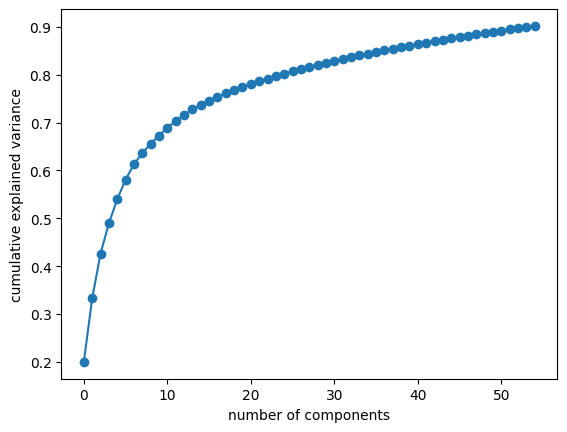

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

variance=0.9
pca = PCA(n_components=variance)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca: ", X_train_pca.shape)
print("X_test_pca", X_test_pca.shape)

#Grafico de caracteristicas vs informacion
plt.plot(np.cumsum(pca.explained_variance_ratio_), "-o")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### TSNE

X_train_tsne:  (132, 3)
X_test_tsne:  (57, 3)
Trustworthiness de t-SNE: 0.9136730205278593


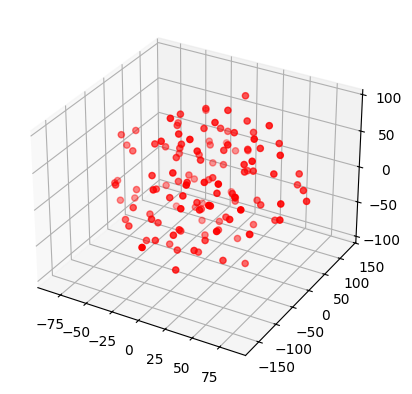

In [12]:
from sklearn.manifold import TSNE
from sklearn.manifold import trustworthiness

tsne = TSNE(n_components=3)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

print("X_train_tsne: ", X_train_tsne.shape)
print("X_test_tsne: ", X_test_tsne.shape)

tsne_trust = trustworthiness(X_train, X_train_tsne)
print(f"Trustworthiness de t-SNE: {tsne_trust}")

# Gráfico de los datos transformados con t-SNE (3D)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_tsne[:,0], X_train_tsne[:,1], X_train_tsne[:,2], c="red")
plt.show()



### UMAP

C:\Users\jeffr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


X_train_umap:  (132, 2)
X_test_umap:  (57, 2)
Trustworthiness de UMAP: 0.9774193548387097


C:\Users\jeffr\AppData\Local\Temp\ipykernel_20280\357642840.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=['blue'], cmap='viridis', s=50)


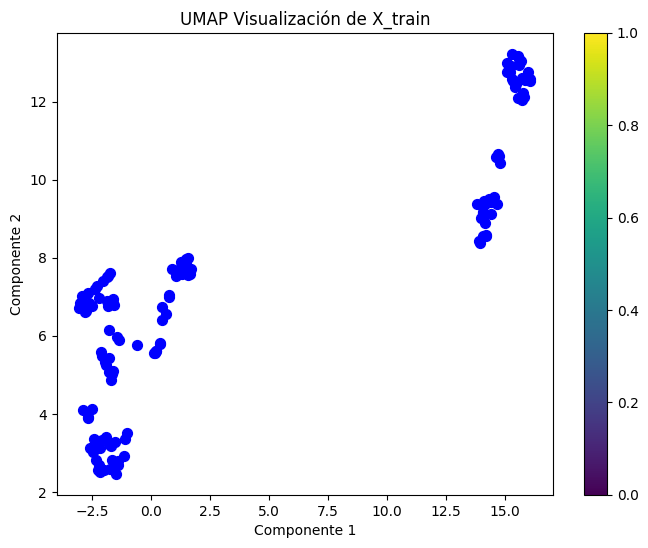

In [13]:
#!pip install umap-learn
import umap

umap = umap.UMAP(n_components=2)
X_train_umap = umap.fit_transform(X_train)
X_test_umap = umap.transform(X_test)

print("X_train_umap: ", X_train_umap.shape)
print("X_test_umap: ", X_test_umap.shape)

umap_trust = trustworthiness(X_train, X_train_umap)
print(f"Trustworthiness de UMAP: {umap_trust}")

# Gráfico de los datos transformados con UMAP (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=['blue'], cmap='viridis', s=50)
plt.colorbar()
plt.title('UMAP Visualización de X_train')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()



# Clustering algorithms

## Tasks
----
  1. Use K-[Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html), [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), and [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) from sklearn to identify clusters in the data.
  2. Use GridSearchCV to find the best hyperparameters for each model. [Link to GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
  3. Finally, use the [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) and [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) metrics from sklearn.

------
 **Note: You have the true label values, so you can assign a label to each cluster based on majority vote and check how many correct or incorrect classifications are made in each class.**

## Example of GridSearchCV
```python
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

iris = load_iris()
X = iris.data

kmeans = KMeans()

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],  
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30]  
}

scorer = make_scorer(silhouette_score, metric='euclidean')
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring=scorer)
grid_search.fit(X)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Silhouette Score: {grid_search.best_score_}")


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

iris = load_iris()
X = iris.data
Y = iris.target

kmeans = KMeans()

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],  
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30]  
}

scorer = make_scorer(silhouette_score, metric='euclidean')
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring=scorer)
grid_search.fit(X)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Silhouette Score: {grid_search.best_score_}")

### Silhouette Scorer

In [39]:
def silhouette_scorer(estimator, X):
    try:
        labels = estimator.fit_predict(X)
        n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)


        if n_clusters > 1:
            return silhouette_score(X, labels)
        else:
            return -1
    except Exception as e:
        return -1

## K-Means

In [38]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
ss = silhouette_score(X, kmeans.fit_predict(X))

print(f"Silhouette Score: {ss}")

Silhouette Score: 0.496137786540463


## MeanShift

In [42]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import numpy as np

# def silhouette_scorer(estimator, X, y=None):
#     labels = estimator.fit_predict(X)
#     num_labels = len(np.unique(labels))
    
#     # Verificar si el número de clusters es adecuado
#     if num_labels < 2 or min(np.bincount(labels)) < 2:
#         return 0  # Puntaje bajo si no hay suficientes clusters válidos
    
#     # Calcular el puntaje de silhouette si los clusters son válidos
#     return silhouette_score(X, labels, metric='euclidean')

mean_shift = MeanShift()

param_grid_meanshift = {
    'bandwidth': np.linspace(2, X_train_pca.shape[0], 100)  # Valores de ancho de banda entre 2 y el número de muestras
}

grid_search_meanshift = GridSearchCV(estimator=mean_shift, param_grid=param_grid_meanshift, scoring=silhouette_scorer, cv=5)

grid_search_meanshift.fit(X_train_pca)

print(f"Best Hyperparameters for MeanShift: {grid_search_meanshift.best_params_}")
print(f"Best Silhouette Score for MeanShift: {grid_search_meanshift.best_score_}")



# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(X_train_pca)

# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# n_clusters_ = len(np.unique(labels))

# print(labels)
# print(f"Number of estimated clusters: {n_clusters_}")	



Best Hyperparameters for MeanShift: {'bandwidth': 122.8080808080808}
Best Silhouette Score for MeanShift: 0.2738782527787905


In [44]:
bandwidth = estimate_bandwidth(X_train_pca, quantile=0.2)
print(f"Best Bandwidth using estimate_bandwidth: {bandwidth}")

Best Bandwidth using estimate_bandwidth: 168.63257968124952


In [45]:
Xdd = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])
print(Xdd)
bw = estimate_bandwidth(Xdd, quantile=0.5)
print(bw)

[[1 1]
 [2 1]
 [1 0]
 [4 7]
 [3 5]
 [3 6]]
1.6191294403531442


## DBSCAN

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, make_scorer

#y_train = y_train.ravel()

def dbscan_silhouette_scorer(estimator, X):
    try:
        labels = estimator.fit_predict(X)
        n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)


        if n_clusters > 1:
            return silhouette_score(X, labels)
        else:
            return -1
    except Exception as e:
        return -1

param_grid_dbscan = {
    'eps': np.linspace(99, 500, 1000),
    'min_samples': [300, 235, 10, 4, 19, 30, 24, 94, 492, 213, 31, 13, 41, 93, 34, 52]
}

dbscan = DBSCAN()

grid_search_dbscan = GridSearchCV(estimator=dbscan, param_grid=param_grid_dbscan, scoring=dbscan_silhouette_scorer, cv=3)

grid_search_dbscan.fit(X_train_pca)

best_dbscan = grid_search_dbscan.best_estimator_

y_dbscan = best_dbscan.fit_predict(X_train_pca)

if len(y_train) == len(y_dbscan):
    if len(np.unique(y_dbscan)) > 1:
        silhouette_dbscan = silhouette_score(X_train_pca, y_dbscan)
    else:
        silhouette_dbscan = 'No se puede calcular con un solo clúster.'

    adjusted_rand_dbscan = adjusted_rand_score(y_train, y_dbscan)

    print('DBSCAN: Mejor eps = ' + str(best_dbscan.eps) + ', Mejor min_samples = ' + str(best_dbscan.min_samples))
    print('Silhouette Score (DBSCAN): ' + str(silhouette_dbscan))
    print('Adjusted Rand Score (DBSCAN): ' + str(adjusted_rand_dbscan))
else:
    print("Los tamaños de y_train y y_dbscan no coinciden.")

ValueError: labels_true must be 1D: shape is (132, 1)

# Analyzing clustering quality

Verify the quality of each cluster using the Rand Index Score (explicit metric) and Silhouette Coefficient (implicit metric). This function takes the labels generated by the model and the true labels and verifies the quality of the clustering. The closer the result is to 1, the better the clustering.

- ARI >= 0.90: Excellent recovery.
- 0.80 <= ARI < 0.90: Good recovery.
- 0.65 <= ARI < 0.80: Moderate recovery.
- ARI < 0.65: Poor recovery.

----

**Report the results of your Rand Index Score and Silhouette Coefficient for each clustering method, as well as with PCA, UMAP, and t-SNE dimensionality reduction techniques.**

## Questions:

1. How does the performance of each clustering method (K-Means, MeanShift, DBSCAN, and Agglomerative Clustering) vary in terms of the Rand Index and Silhouette Coefficient? Explain which methods performed best and why.

2. After applying GridSearchCV, which hyperparameters turned out to be the best for each clustering method? Explain how these hyperparameters affected the model's performance.

3. What differences did you observe in the clustering results when reducing dimensionality with PCA, UMAP, and t-SNE? Which dimensionality reduction technique do you think best preserved the structure of the data?

4. When you assigned labels to the clusters using majority vote, what was the percentage of correct and incorrect classifications for each method? Which clustering method achieved the highest number of correct classifications?

5. How do you interpret the Silhouette Coefficient values in this experiment? What do they indicate about the quality of the clusters formed?

6. Comparing the Adjusted Rand Score across the different clustering methods, what observations can you make about their ability to find groups similar to the true class labels?

7. In what situations do you think each clustering algorithm would be most appropriate? For example, when would you choose DBSCAN over K-Means or Agglomerative Clustering?
